https://www.ime.usp.br/~coelho/mac328/pf/bellman.html

In [1]:
import random
from graphviz import Digraph
import pandas as pd
from IPython.display import display
random.seed()

In [2]:
class Node:
    def __init__(self, index):
        self.predecessor = None
        self.distance = float('inf')
        self.visited = False
        self.index = index

In [67]:
def show_graph(graph):
    g=Digraph('G')
    g.node_attr.update(shape='circle')
    for x in range(len(graph[0])):
        for y in range(len(graph[0])):
            if(x != y):
                value = graph[x][y]
                if(value!=None):
                    g.edge(str(x),str(y),label=str(value))
    return display(g)

def show_solution(graph, solution):
    g=Digraph('H')
    g.node_attr.update(shape='circle')
    for x in range(len(graph[0])):
        for y in range(len(graph[0])):
            if(x != y):
                value = graph[x][y]
                if(value!=None):
                    if(contains_edge(solution,x,y)):
                        g.edge(str(x),str(y),label=str(graph[x][y]), color='red')
                    else:
                        g.edge(str(x),str(y),label=str(value))                        
    return display(g)

def contains_edge(solution, source, target):
    previous = solution[0]
    #print(solution)
    #print("contains %d -> %d? " % (source, target))
    for node in solution:
        if(node!=solution and previous==source and node == target):
            #print("yes")
            return True
        previous = node
    #print("no")
    return False

def generate_complete_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            if(x == y):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph
        
def generate_random_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            edge_exists = random.randint(1,3)
            if(x == y or edge_exists != 1):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph

def generate_random_directed_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices*3):
        source = random.randint(0, nr_vertices-1)
        target = source
        while(target == source):
            target = random.randint(0, nr_vertices-1)
        #print("source=%d target= %d" % (source, target))
        weight = random.randint(1,max_weight)
        graph[source][target] = weight
    return graph


def get_node(nodes, node_index):
    for node in nodes:
        if(node.index == node_index):
            return node

def get_next_node(nodes):
    min = float('inf')
    min_node = None
    for node in nodes:
        if(not node.visited and node.distance < min):
            min = node.distance
            min_node = node
    return min_node

In [68]:
nr_vertices = 10
graph = generate_random_directed_graph(nr_vertices, 25)
#show_graph(graph)

In [69]:
# graph = [
#     [None,7,1,None,None,None],
#     [None,None,None,4,None,None],
#     [None,5,None,None,2,7],
#     [None,None,None,None,None,None],
#     [None,2,None,5,None,None],
#     [None,None,None,None,3,None]
# ]

Distance = 43.000000 
[0, 3, 7, 4]


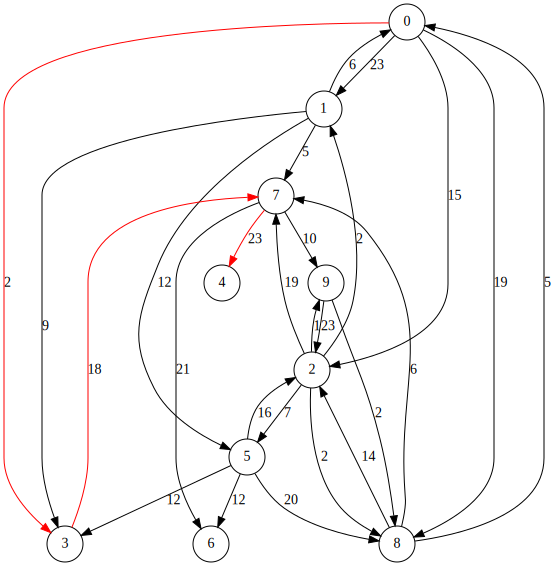

In [70]:
def bellman_moore_desopo(source, graph):
    nodes =  [Node(index) for index in range(len(graph[0]))]
    current = get_node(nodes, source)
    current.distance = 0
    queue = [current]
    while(len(queue)!=0):
        current = queue.pop(0)
        #print("Current node: %d" % current.index)
        for neighbor in range(0,len(graph[0])):
            neighbor_node = get_node(nodes, neighbor)
            if(neighbor != current.index):
                neighbor_dist = graph[current.index][neighbor]
                if(neighbor_dist != None):
                    if(neighbor_node.distance > current.distance + neighbor_dist):
                        neighbor_node.distance = current.distance + neighbor_dist
                        neighbor_node.predecessor = current.index
                        if(neighbor_node not in queue):
                            queue.append(neighbor_node)
        
        #if(current!=None):
            #print("Next node: %d with dist=%d" % (current.index, current.distance))
    return nodes

def get_minimum_path(nodes, source, target):
    target_node = get_node(nodes, target)
    current = target_node
    print("Distance = %f " % target_node.distance)
    path = [target_node.index]
    
    while(current.index != source and current.predecessor != None):
        current = get_node(nodes, current.predecessor)
        path.append(current.index)
    path.reverse()
    print(path)
    return path

source = 0
target = 4
nodes = bellman_moore_desopo(source,graph)
path = get_minimum_path(nodes,source, target)
if(source in path):
    show_solution(graph, path) 
else:
    print("No solution found")
    show_graph(graph)